# ACF & PACF

### Autocorrelation and Partial Autocorrelation 

In [1]:
# usual library imports #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# ignore the unwanted warnings #
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [7]:
# import the dataset to demonstrate acf and pacf#
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.index.freq = 'MS'

In [12]:
female = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
female.index.freq = 'D'

In [13]:
# import the required statstools #
from statsmodels.tsa.stattools import acf,pacf,acovf,pacf_yw,pacf_ols

In [14]:
acf(airline['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [15]:
acf(airline['Thousands of Passengers'],unbiased=True)

array([1.        , 0.95467704, 0.88790688, 0.82384458, 0.774129  ,
       0.73944515, 0.71137419, 0.69677541, 0.69417581, 0.71567822,
       0.75516171, 0.80471118, 0.82952186, 0.78338294, 0.71594837,
       0.65405405, 0.60519959, 0.56664286, 0.53569601, 0.51825101,
       0.51285925, 0.53528635, 0.56948699, 0.61542385, 0.6386278 ,
       0.5977521 , 0.53416841, 0.47704972, 0.43203107, 0.3944146 ,
       0.36441703, 0.34509264, 0.33980156, 0.35909103, 0.39079178,
       0.43013344, 0.4493648 , 0.40822635, 0.34502547, 0.28889875,
       0.23839051])

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [18]:
from pandas.plotting import lag_plot

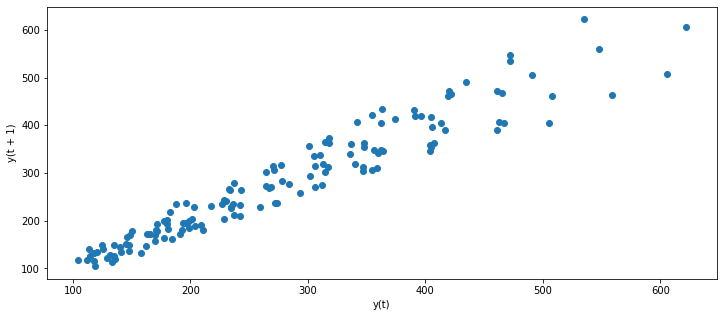

In [24]:
lag_plot(airline['Thousands of Passengers'])

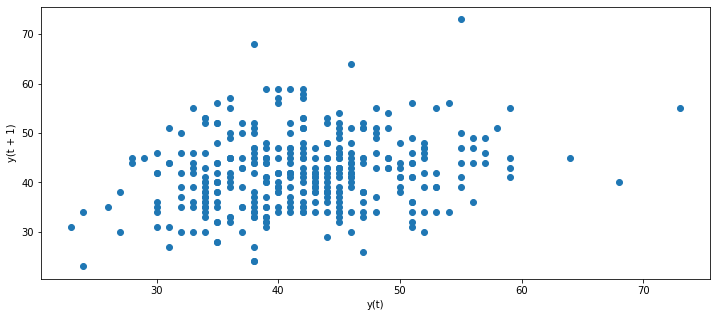

In [23]:
lag_plot(female['Births'])

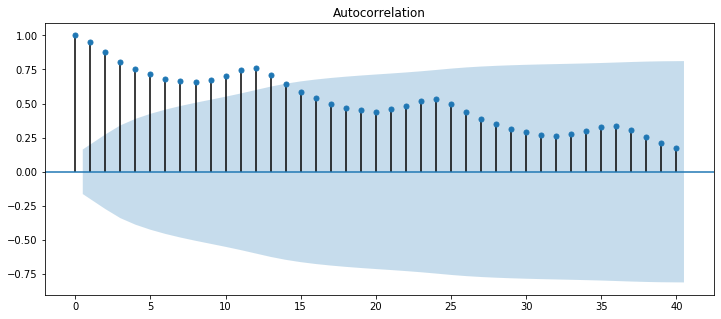

In [26]:
plot_acf(airline['Thousands of Passengers'],lags=40);

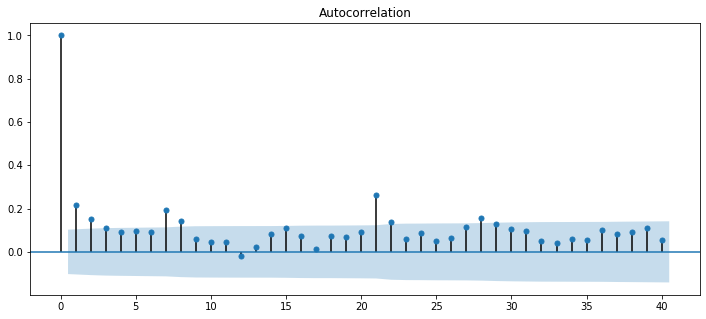

In [28]:
plot_acf(female['Births'],lags=40);

In [32]:
# PACF plots - which is best when the dataset is stationary #

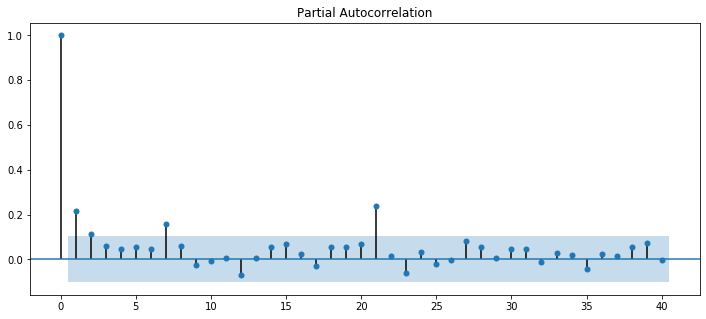

In [34]:
plot_pacf(female['Births'],lags=40);

In [36]:
# make the airline dataset stationary using differencing #
from statsmodels.tsa.statespace.tools import diff

In [37]:
airline['d1'] =  diff(airline['Thousands of Passengers'],k_diff=1)

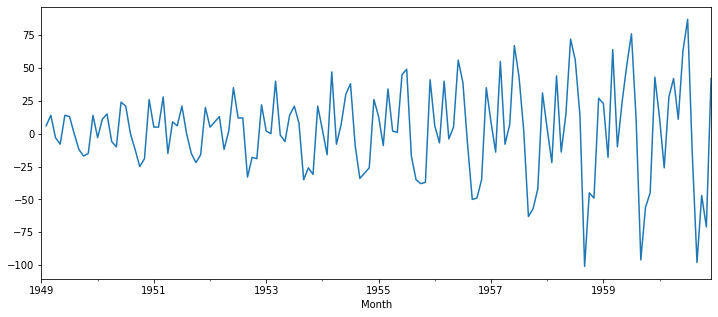

In [38]:
airline['d1'].plot()

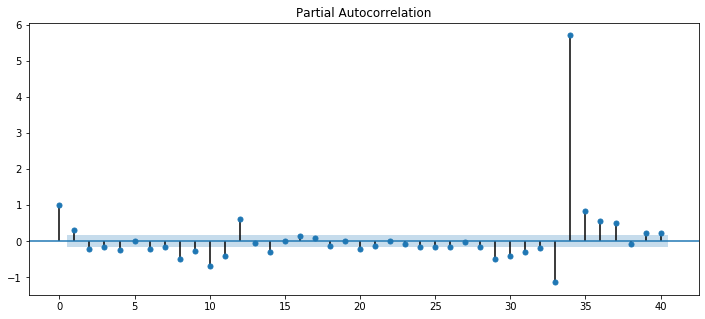

In [43]:
plot_pacf(airline['d1'].dropna(),lags= 40); # dropna must be applied to remove NA's introduced by differencing #